In [1]:
import pandas as pd
import numpy as np    #Customer segmentation   #Pattern recognition
import matplotlib.pyplot as plt

In [2]:
cd /Users/karampruthi/Downloads

/Users/karampruthi/Downloads


# Loading & Merging Files

In [3]:
Nov = pd.read_excel('New Analysis Data.xlsx',sheet_name=0)
Dec = pd.read_excel('New Analysis Data.xlsx',sheet_name=1)
Jan = pd.read_excel('New Analysis Data.xlsx',sheet_name=2)

data = [Nov,Dec,Jan]

In [4]:
data_join = pd.concat(data)
data_join['location'] = data_join['State'].astype(str) + ', '+ data_join['City'].astype(str)

In [5]:
data_join['Date'] =pd.to_datetime(data_join.Date)
data_join.sort_values(by=['Date'],inplace=True)

In [6]:
data_join.index = pd.to_datetime(data_join.Date)

In [7]:
data_join.drop(['Date'],axis=1)

,Name,Manager,Source,Sub source,Stage,Last Status,Country,State,City,location
Date,,,,,,,,,,
2020-11-01,Vedika Salkar 3,sm001,Diet Clinic,FBA,Followup,Followup,India,Goa,NaN,"Goa, nan"
2020-11-01,Paramita Deb 3,agent05,Diet Clinic,FBA,Followup,Let Us Know,India,West Bengal,Kalyani,"West Bengal, Kalyani"
2020-11-01,harleen kaur 1,agent2,Diet Clinic,OW AP,Lead,NaN,India,Chandigarh,Chandigarh,"Chandigarh, Chandigarh"
2020-11-01,Akash sabale 1,agent05,Diet Clinic,GO-LPF,Followup,Call Back Later,India,Maharashtra,Solapur,"Maharashtra, Solapur"
2020-11-01,Anugya Kapoor 1,agentdeeksha,Diet Clinic,GO-LPF,Followup,Wrong Number,India,Uttar Pradesh,Kanpur,"Uttar Pradesh, Kanpur"
...,...,...,...,...,...,...,...,...,...,...
2021-01-31,Pratik Mate 8,hyderabad,Diet Clinic,GO-LPF,Cancelled,Cancelled,India,Maharashtra,Desaiganj,"Maharashtra, Desaiganj"
2021-01-31,swaranjali kumbhar 8,agent12,Diet Clinic,GO-LPF,Lead,NaN,India,Maharashtra,Mumbai,"Maharashtra, Mumbai"
2021-01-31,unknown 1,agent2,Diet Clinic,DIC GOOGLE,Lead,NaN,India,NaN,NaN,"nan, nan"


In [8]:
data_join.dropna(subset=['City','Sub source'],inplace=True)
new_data = data_join.drop(['Name','Date'],axis=1)

# Checking Null values

In [9]:
new_data.isnull().sum()

Manager           0
Source           55
Sub source        0
Stage             0
Last Status    7438
Country          11
State             0
City              0
location          0
dtype: int64

In [10]:
India_data = new_data[new_data['Country']=='India']
India_data = India_data[India_data['Source']=='Diet Clinic']


filter_data = India_data.drop(['City','Country','Source','Last Status','State'],axis=1)
filter_data.reset_index(drop=True, inplace=True)
filter_data

,Manager,Sub source,Stage,location
0,agent05,FBA,Followup,"West Bengal, Kalyani"
1,agent2,OW AP,Lead,"Chandigarh, Chandigarh"
2,agent05,GO-LPF,Followup,"Maharashtra, Solapur"
3,agentdeeksha,GO-LPF,Followup,"Uttar Pradesh, Kanpur"
4,sm001,FBA,Followup,"Telangana, Hyderabad"
...,...,...,...,...
27077,hyderabad,GO-LPF,Cancelled,"Rajasthan, Jaipur"
27078,hyderabad,GO-LPF,Cancelled,"Maharashtra, Desaiganj"
27079,agent12,GO-LPF,Lead,"Maharashtra, Mumbai"
27080,hyderabad,GO-LPF,Followup,"Bihar, Gaya"


In [11]:
filter_data.Stage.value_counts()

Followup       13192
Lead           11410
Cancelled       2015
Appointment      463
Confirmed          2
Name: Stage, dtype: int64

# Converting categories

In [12]:
testing = filter_data[(filter_data.Stage=='Followup')|(filter_data.Stage=='Lead')|(filter_data.Stage=='Cancelled')]
dummies = pd.get_dummies(data=testing, columns=['Manager','Sub source','location'])
x = dummies.drop('Stage',axis=1)
y = dummies['Stage'].apply(lambda x:1 if x=='Followup' else 0 if x=='Cancelled' else 2 ) 

In [13]:
x

,Manager_Aman,Manager_Anamika,Manager_Bhumika,Manager_Bindu,Manager_Goa Clinic,Manager_Kanchan,Manager_Neha,Manager_Online manager,Manager_Parminder,Manager_Poonam,...,"location_West Bengal, Siliguri","location_West Bengal, Singur","location_West Bengal, Siuri","location_West Bengal, Sodpur","location_West Bengal, Sukdal","location_West Bengal, Tamluk","location_West Bengal, Tarakeswar","location_West Bengal, Tufanganj","location_West Bengal, Ulubaria","location_West Bengal, Uttarpara-Kotrung"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y.value_counts()

1    13192
2    11410
0     2015
Name: Stage, dtype: int64

# Handling Imbalance Dataset

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = RandomOverSampler()
x,y = smote.fit_sample(x,y)

In [16]:
y.value_counts()

2    13192
1    13192
0    13192
Name: Stage, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# LR = LogisticRegression(max_iter=300)   #   
# LR = DecisionTreeClassifier(criterion='gini',max_depth=93)  # 65.3
LR = RandomForestClassifier()  
 
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.7616063607573613

In [18]:
# print(cross_val_score(LR, x, y, cv=10))
LR.score(X_test,y_test)

0.6587831008692137

In [19]:
# cross_val_score(LR, X_test, y_test, cv=10)

In [20]:
LR.predict(X_test)

array([0, 0, 2, ..., 1, 2, 1])

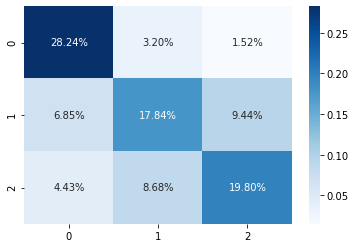

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_pred = LR.predict(X_test)
test_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(test_matrix/np.sum(test_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
def predict(Manager, source, location):
    Manager = 'Manager_'+ Manager
    source = 'Sub source_'+source
    location = 'location_'+location
    new = pd.DataFrame(columns=x.columns)
    new[Manager]=[1]
    new[source]=[1]
    new[location]=[1]
    new = new.fillna(0)
    prediction = LR.predict_proba(new)
    pred = pd.DataFrame(columns=['Cancelled','Followup','Lead'])
    pred['Cancelled'] = [str(round(prediction[0][0]*100))+'%']
    pred['Followup'] = [str(round(prediction[0][1]*100))+'%']
    pred['Lead'] = [str(round(prediction[0][2]*100))+'%']
    return pred

In [24]:
Managers = []
for i in x.columns:
    if i.split('_')[0]=='Manager':
        Managers.append(i.split('_')[1])
Location = []
for i in x.columns:
    if i.split('_')[0]=='location':
        Location.append(i.split('_')[1])
Sources = []
for i in x.columns:
    if i.split('_')[0]=='Sub source':
        Sources.append(i.split('_')[1])

# Types of Sources

In [25]:
Sources

['DIC FACEBOOK',
 'DIC GOOGLE',
 'FB AP.',
 'FB LBF',
 'FB-LPF',
 'FBA',
 'FBC',
 'FBI',
 'GO-LPF',
 'IG',
 'LPC',
 'OGN',
 'OTH',
 'OW AP',
 'OW AP.',
 'OWF',
 'REF',
 'WWC',
 'YT',
 'fb-lpf']

# Different Managers

In [26]:
Managers

['Aman',
 'Anamika',
 'Bhumika',
 'Bindu',
 'Goa Clinic',
 'Kanchan',
 'Neha',
 'Online manager',
 'Parminder',
 'Poonam',
 'Pune Clinic',
 'Ritika',
 'Vashi Clinic',
 'agent meena',
 'agent001',
 'agent03',
 'agent04',
 'agent05',
 'agent06',
 'agent07',
 'agent08',
 'agent09',
 'agent10',
 'agent11',
 'agent12',
 'agent2',
 'agentdeeksha',
 'ahmedabad',
 'bengaluru',
 'delhi',
 'gurgaon',
 'harkirat',
 'hyderabad',
 'jyoti',
 'lucknow',
 'manminder',
 'sm001']

# Different Locations

In [27]:
Location

['Andaman and Nicobar Islands, Port Blair',
 'Andhra Pradesh, Adoni',
 'Andhra Pradesh, Amalapuram',
 'Andhra Pradesh, Anantapur',
 'Andhra Pradesh, Badvel',
 'Andhra Pradesh, Bhimavaram',
 'Andhra Pradesh, Challapalle',
 'Andhra Pradesh, Chilakaluripet',
 'Andhra Pradesh, Chirala',
 'Andhra Pradesh, Chittoor',
 'Andhra Pradesh, Cuddapah',
 'Andhra Pradesh, Eluru',
 'Andhra Pradesh, Guntur',
 'Andhra Pradesh, Kadiri',
 'Andhra Pradesh, Kaikalur',
 'Andhra Pradesh, Kakinada',
 'Andhra Pradesh, Kantabamsuguda',
 'Andhra Pradesh, Kavali',
 'Andhra Pradesh, Kollapur',
 'Andhra Pradesh, Krishna',
 'Andhra Pradesh, Kuppam',
 'Andhra Pradesh, Kurnool',
 'Andhra Pradesh, Machilipatnam',
 'Andhra Pradesh, Madanapalle',
 'Andhra Pradesh, Markapur',
 'Andhra Pradesh, Marturu',
 'Andhra Pradesh, Nagari',
 'Andhra Pradesh, Nandigama',
 'Andhra Pradesh, Nandyal',
 'Andhra Pradesh, Narasannapeta',
 'Andhra Pradesh, Narasaraopet',
 'Andhra Pradesh, Narsipatnam',
 'Andhra Pradesh, Nellore',
 'Andhra Pr

# Dashboard

In [28]:
Manager = input('Manager = ')
Source = input('Source = ')
Location = input('Location = ')
predict(Manager,Source,Location)      # Aman # FBA # Chandigarh, Chandigarh

Manager = agent001
Source = FBA
Location = Goa, Margao


,Cancelled,Followup,Lead
0,7%,53%,40%


In [31]:
for i in Managers:
    j = 'Goa, Margao'
    k = 'FBA'
    print(i.upper(),'----->>>>',j.upper(),'---->>>>',k.upper())
    print(predict(i,k,j),'\n')

AMAN ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        0%      63%  37% 

ANAMIKA ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0       29%      20%  51% 

BHUMIKA ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        0%      22%  78% 

BINDU ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        6%      66%  27% 

GOA CLINIC ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        0%      87%  13% 

KANCHAN ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        0%      65%  35% 

NEHA ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        9%      71%  20% 

ONLINE MANAGER ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        0%      86%  13% 

PARMINDER ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        4%      65%  31% 

POONAM ----->>>> GOA, MARGAO ---->>>> FBA
  Cancelled Followup Lead
0        1%      21%  78% 

PUNE CLINIC ----->>>> GOA, 